# **Hack the Markets Group Challenge (Femhack 2022)**
#### **Category**: Data Science
#### **Group: 6**
#### **Members**: Glòria T. Ibars, Marta Ballester, Viridiana Méndez, Miruna Andreea Gheata
#### **Date**: 23/01/2022

***

# **Table of contents**

[1. Introduction to the challenge](#intro)   

[2. Loading the data](#loading-data)   

[3. EDA (Summarized)](#eda)   

[4. Data Wrangling](#wrangling)   

[5. Searching for Classification Models](#classif_model)

***

# **1. Introduction to the challenge**<a class="anchor" id="intro"></a>

The challenge definition can be found @[Nuwe](https://nuwe.io/challenge/hack-the-markets-predictive-modelling).

<img src="img/femhack.jpeg">

## **1.1. Background**

To improve the European central bank's decision making, Christine Lagarde would need to have some certainty about future currency market dynamics, in particular, one of the ones she is most concerned about is the EUR/GBP pair. Therefore, they need your team to create a small predictive model for them to know if the value of the Euro will rise or fall against the British pound a month in advance.

## **1.2. Dataset**
A dataset of historical information on the EURO-LIBRA pair is provided. A currency pair is the dyadic quotation of the relative value of a currency unit against the unit of another currency in the foreign exchange market. For example: EURGBP = 0,9 means that 1 EURO has a value of 0,9 GBP. Historical prices in the dataset goes from January 3rd 2000 to Octobre 29th 2019. The information is given on a weekly timeframe, i.e. each row of the dataset corresponds to 1 week. The dataset contains **8 predictor variables**. The predictive variables of the dataset are:

```Open```: Price of the pair at the beginning of the day.

```High```: Maximum price that the pair reaches during the week.

```Low```: Minimum price that the pair reaches during the week.

```Close```: Price of the pair at the end of the week.

```rsi```: Relative Strength Index, is an indicator that is often used in technical analysis and shows the strength of the price.

```ema_fast```: Exponential Moving Average taking the average value of 14 weeks.

```ema_slow```: Exponential Moving Average taking the average value of 42 weeks.

The moving averages are usually used to detect trends in the markets, when the fast moving average (```ema_fast```) exceeds the slow moving average (```ema_slow```) indicates the beginning of an uptrend.

```volatility```: Volatility is a measure of the intensity of changes in the price of an asset. In this case the volatility has been obtained from the NATR (Normalized Average True Range).


**Target**:

```target```: The target is defined by two values, 1 or 0. If target is 1 means that in the next month, the closing price of the EURGDP pair will be higher than this week's closing price. If target is 0 means that in the next month, the closing price of the EURGDP pair will be lower than this week's closing price.

## **1.3. Tasks**

1. Generate a predictive classification model (you can use any type of algorithm) that allows you to predict the ‘target’ of the dataset. Train your model with the train dataset, and once you find the model that maximizes the f1-score(macro), input the data from the test_x dataset into your algorithm to get the predictions of your algorithm.

# **2. Loading the data**<a class="anchor" id="loading-data"></a>

### *2.0.1 Library imports*

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test_x.csv")

In [3]:
train.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility,target
count,1035.000000,1035.000000,1035.000000,1035.000000,1021.000000,1022.000000,994.000000,1021.000000,1035.000000
mean,0.766462,0.775037,0.758744,0.766788,51.264480,0.767037,0.767578,2.155019,0.503382
std,0.099069,0.109941,0.101508,0.099102,10.268314,0.097296,0.093424,1.480081,0.500230
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340,0.000000
25%,0.679100,0.684500,0.674500,0.679100,44.383073,0.680563,0.682325,1.467247,0.000000
50%,0.787900,0.794610,0.781000,0.787800,50.741770,0.789053,0.783807,1.840244,1.000000
75%,0.859930,0.867000,0.851450,0.861200,57.693333,0.859042,0.856121,2.235330,1.000000
max,0.961400,2.233500,0.943800,0.961600,79.522395,0.903959,0.889572,17.421381,1.000000


In [4]:
test.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.872522,0.879200,0.864103,0.870223,46.207975,0.872368,0.875885,1.891260
std,0.024089,0.025930,0.022963,0.024789,8.286485,0.019571,0.012061,0.519381
min,0.830550,0.836800,0.827600,0.829820,24.054232,0.844211,0.853124,1.270292
25%,0.853925,0.858565,0.846930,0.851225,40.219390,0.854883,0.866750,1.480728
50%,0.863040,0.867160,0.854860,0.860680,44.930832,0.868027,0.874881,1.761582
75%,0.895600,0.904970,0.886670,0.893890,53.676161,0.892287,0.885203,2.127700
max,0.924500,0.949410,0.908210,0.924130,67.219661,0.905205,0.896391,3.454080


# **3. EDA (Summarized)**<a class="anchor" id="eda"></a>

Since the previous challenge consisted in doing an extensive EDA, we will only focus on the correlation of the features to undertsand better the relationship between them before jumping into the creation of the model. If we find any features that have a significant correlation with the target variable, we could use them to train the classification model. 

In [5]:
# check dataset correlation
corr = train.corr()

There doesn't seem to be a any significant correlations between any of the features of the dataset. Let's visualize them in a heatmat to get a better look:

<AxesSubplot:>

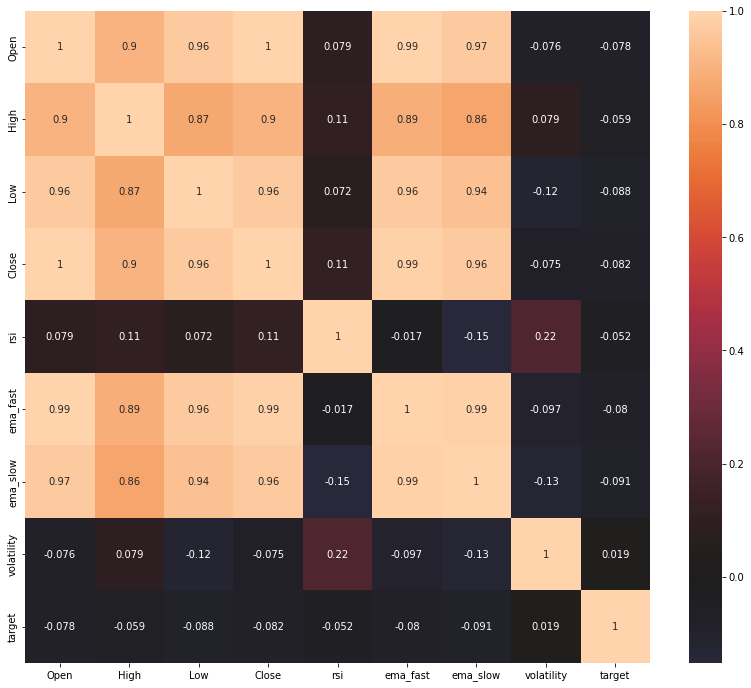

In [6]:
# heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr,
           center=0,
           annot=True)

Let's focus now on the correlation between the predictive features and the target variable.

In [7]:
train.drop(columns=['target']).corrwith(train['target'])

Open         -0.078218
High         -0.059392
Low          -0.087512
Close        -0.082227
rsi          -0.051780
ema_fast     -0.080366
ema_slow     -0.090974
volatility    0.019006
dtype: float64

No feature stands out when looking at the correlation between them and the target variable, so we will have to think of another way to select the input features of the Classification model. 

Next, let's see if the datasets are balanced by looking at the total occurences of each class. 

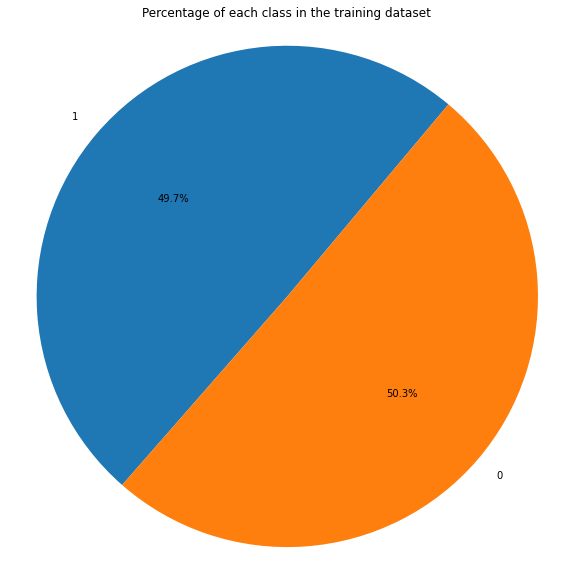

In [8]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie([(train['target'].value_counts()[0] * 100 / train['target'].count()), (train['target'].value_counts()[1] * 100 / train['target'].count())], labels = [1, 0], autopct="%1.1f%%", startangle=50)
ax1.axis("equal")
plt.title("Percentage of each class in the training dataset")
plt.show()

The dataset is well balanced, so there shouldn't be any skewness of the model to a certain value of the target. 

# **4. Data Wrangling**<a class="anchor" id="wrangling"></a>

Now, let's check if the training dataset is consistent (has no null values).

### *4.0.1 Function definitions*

In [9]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
def na_count(df):
    '''
    Counts the total number of null records of each column in the df.
    :param df: dataframe to examine. 
    '''
    print('Feature   Number of NaN')
    print(df.isnull().sum().sort_values(ascending=True))#.loc[lambda x : x!=0])

## **4.1. Deleting the missing value**

In [10]:
na_count(train)

Feature   Number of NaN
Date           0
Open           0
High           0
Low            0
Close          0
target         0
ema_fast      13
rsi           14
volatility    14
ema_slow      41
dtype: int64


We have detected some null values; upon further inspection we have seen that they belong to the first rows in the dataset and that they were given in the Exponential Moving Average values. Since these values need a certain history of the data to be computed, the missing observations are justified. So, we will simply delete the affected rows. 

In [11]:
train = train.dropna()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 994 entries, 41 to 1034
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        994 non-null    object 
 1   Open        994 non-null    float64
 2   High        994 non-null    float64
 3   Low         994 non-null    float64
 4   Close       994 non-null    float64
 5   rsi         994 non-null    float64
 6   ema_fast    994 non-null    float64
 7   ema_slow    994 non-null    float64
 8   volatility  994 non-null    float64
 9   target      994 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 85.4+ KB


# **5. Searching for the best Classification Model**<a class="anchor" id="classif_model"></a>

Now, we will be considering different Classification models to predict the target value. We have chosen 3 different models: ```DecisionTreeClassifier```, ```GradientBoostingClassifier``` and ```XGBClassifier```

### *5.0.1 Library imports*

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate, KFold
import itertools

### *5.0.2 Function definitions*

In [14]:
def get_best_params(X, y, clf, param_grid):
    '''
    Perform the GridSearch for the given classificator with the provided parameters. 
    :param X: predictive features of the data
    :param y: target data
    :param clf: classifier used. 
    :param param_grid: parameters used for the search. These parameters correspond to the ones that the classifier accepts. 
    :return: the best parameters and the best score. 
    '''
    gridsearch_clf = GridSearchCV(estimator=clf,
                                  param_grid=param_grid,
                                  scoring='f1',
                                  n_jobs=-1,
                                  return_train_score=True)
    gridsearch_clf.fit(X=X, y=y)
    return gridsearch_clf.best_params_, gridsearch_clf.best_score_

In [15]:
def get_feature_combinations(features):
    '''
    Computes all the different combinations possible with the given list of features. 
    :param features: list of features. 
    :return: list with the different combinations. 
    '''
    combinations = []
    for r in range(len(features)+1):
        for combination in itertools.combinations(features, r):
            combinations.append(combination)
            
    idx_comb = 1
    total_scores = []
    total_params = []

    for combination in combinations[1:]: 
        X = X_train_scaled[list(combination)]
        # Decision Tree
        params, scores = get_best_params(X, y=y_train, clf=clf_decision_tree, param_grid=param_grid_decision_tree)
        total_scores.append(round(scores, 4))
        total_params.append(params)
        idx_comb += 1
        
    return combinations[1:], total_scores, total_params

In [16]:
def evaluate_model(clf, X_train, y_train, X_val, y_val, y_pred):
    '''
    Computes the confusion matrix and applies KFold to obtain the F-1 score of the model.
    :param clf: classifier used. 
    :param X_train: predictive data of the training.
    :param y_train: target data of the training.
    :param X_val: predictive data of the validation.
    :param y_val: target data of the validation.
    :param y_pred: predicted target of the model. 
    '''
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    print("Classification Report")
    print(classification_report(y_val, y_pred))

    kfold = KFold(n_splits=10, shuffle=True)
    kf_cv_scores = cross_validate(clf, X_train, y_train, cv=kfold, scoring={'f1_score' : make_scorer(f1_score)})
    print("K-fold CV training average f-1 score: ", kf_cv_scores['test_f1_score'].mean())

    kf_cv_scores = cross_validate(clf, X_val, y_val, cv=kfold, scoring={'f1_score' : make_scorer(f1_score)})
    print("K-fold CV validation average f-1 score: ", kf_cv_scores['test_f1_score'].mean())

In [17]:
y_train = train['target']
X_train = train.drop(['target', 'Date'], axis=1)

dates = test['Date']
test = test.drop(['Date'], axis=1)

## **5.1. Scaling the data**

First, both the train and test datasets have to be scaled because the features have different distributions and when dealing with machine learning task it is better to have normalized data.

In [18]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_train_scaled.columns = X_train.columns

X_test_scaled = pd.DataFrame(scaler.fit_transform(test))
X_test_scaled.columns = test.columns

Before scaling:

In [19]:
X_train.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.772824,0.781474,0.765153,0.773208,51.432470,0.771402,0.767578,2.141888
std,0.095873,0.107394,0.098407,0.095810,10.279223,0.095062,0.093424,1.497803
min,0.578300,0.587600,0.006600,0.578400,19.171099,0.598982,0.607234,1.006340
25%,0.683400,0.687625,0.678325,0.683625,44.506477,0.682408,0.682325,1.454325
50%,0.791950,0.799305,0.784705,0.791950,50.783937,0.791200,0.783807,1.809152
75%,0.862047,0.869650,0.853240,0.862950,57.851999,0.860613,0.856121,2.209401
max,0.961400,2.233500,0.943800,0.961600,79.522395,0.903959,0.889572,17.421381


After scaling:

In [20]:
X_train_scaled.describe()

,Open,High,Low,Close,rsi,ema_fast,ema_slow,volatility
count,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000,994.000000
mean,0.507763,0.117792,0.809382,0.508371,0.534560,0.565353,0.567916,0.069177
std,0.250256,0.065249,0.105001,0.250026,0.170323,0.311702,0.330894,0.091246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.274341,0.060772,0.716736,0.274596,0.419798,0.273549,0.265962,0.027291
50%,0.557687,0.128626,0.830244,0.557281,0.523814,0.630271,0.625396,0.048907
75%,0.740662,0.171365,0.903372,0.742563,0.640929,0.857870,0.881522,0.073290
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **5.2. Splitting the data into test and train**

In order to train correctly the model, we need some kind of validation data to know if the model has learned from the data. We will be splitting the training dataset into two new ones: the **training** one, which the model will use to learn, and the **validation** one, which will be used to see if the model can make correct predictions.  

In [21]:
# split train and test 
scoring = {'f1_score' : make_scorer(f1_score)}

state = 12
# Percentage of data that will be used for validation purposes
test_size = 0.30
X_train_aux, X_val, y_train_aux, y_val = train_test_split(X_train_scaled, y_train, test_size=test_size, random_state=state)

## **5.3. Training the Models** 

Earlier we have tried to determine if any features are more relevant than others to the target variable, but we haven't been able to find any. The model can also have different parameters, so the total combination of possible models is very high. One method that is extensively used in the machine learning community is the GridSearch method, which applies all the different combinations possible and returns the one that gives the best score. We will be searching for the best combination of parameters and also features using this method. The classification model used in this case will be the ```DecisionTreeClassifier```, as it is the fastest one to finish. 

### ***5.3.1. GridSearch***

In [22]:
random_state = 42

param_grid_decision_tree = {'max_depth': [2, 3, 4, 5],
                            'max_features': ['sqrt', 'auto', 'log2'],
                           "criterion": ["entropy",  "gini"]}
clf_decision_tree = DecisionTreeClassifier(random_state=random_state)

In [23]:
combinations, total_scores, total_params = get_feature_combinations(X_train.columns)

In [24]:
df_gridsearchcv = pd.DataFrame(list(zip(combinations, total_scores, total_params)), columns = (["Features", "Score", "Best Params"]))

In [25]:
df_gridsearchcv.sort_values("Score", ascending=False).head(10)

,Features,Score,Best Params
30,"(rsi, ema_fast)",0.6985,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
66,"(High, rsi, ema_fast)",0.6982,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
88,"(rsi, ema_fast, ema_slow)",0.6970,"{'criterion': 'entropy', 'max_depth': 3, 'max_..."
89,"(rsi, ema_fast, volatility)",0.6970,"{'criterion': 'entropy', 'max_depth': 3, 'max_..."
52,"(Open, rsi, ema_slow)",0.6969,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
82,"(Close, rsi, ema_fast)",0.6961,"{'criterion': 'entropy', 'max_depth': 5, 'max_..."
69,"(High, ema_fast, ema_slow)",0.6956,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
85,"(Close, ema_fast, ema_slow)",0.6955,"{'criterion': 'entropy', 'max_depth': 4, 'max_..."
103,"(Open, High, rsi, volatility)",0.6945,"{'criterion': 'gini', 'max_depth': 2, 'max_fea..."
101,"(Open, High, rsi, ema_fast)",0.6945,"{'criterion': 'gini', 'max_depth': 2, 'max_fea..."


As we can see, the best combination for this model gives a score of $0.6985$, and the features used are ```rsi``` and ```ema_fast```. The models will be trained using:

1. all features

2. ```rsi``` and ```ema_fast``` features. This makes sense as these features represent the different changes in the price while taking into account the temporal information. 

### **5.3.2. DecisionTreeClassifier**

We will be using the best parameters found in the previous section.

In [26]:
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
dt_1.fit(X_train_aux[["rsi", "ema_fast"]], y_train_aux)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [27]:
evaluate_model(dt_1, X_train_aux[["rsi", "ema_fast"]], y_train_aux, X_val[["rsi", "ema_fast"]], y_val, dt_1.predict(X_val[["rsi", "ema_fast"]]))

Confusion Matrix:
[[ 29 116]
 [  6 148]]
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.20      0.32       145
           1       0.56      0.96      0.71       154

    accuracy                           0.59       299
   macro avg       0.69      0.58      0.52       299
weighted avg       0.69      0.59      0.52       299

K-fold CV training average f-1 score:  0.6806682306121646
K-fold CV validation average f-1 score:  0.6609164457848019


In [28]:
dt_2 = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
dt_2.fit(X_train_aux, y_train_aux)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [29]:
evaluate_model(dt_2, X_train_aux, y_train_aux, X_val, y_val, dt_2.predict(X_val))

Confusion Matrix:
[[ 29 116]
 [  9 145]]
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.20      0.32       145
           1       0.56      0.94      0.70       154

    accuracy                           0.58       299
   macro avg       0.66      0.57      0.51       299
weighted avg       0.66      0.58      0.51       299

K-fold CV training average f-1 score:  0.68617278364115
K-fold CV validation average f-1 score:  0.556493752736485


### **5.3.2. GradientBoostingClassifier**

In [30]:
gb_clf1 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf1.fit(X_train_aux.values, y_train_aux.values)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [31]:
evaluate_model(gb_clf1, X_train_aux, y_train_aux, X_val, y_val, gb_clf1.predict(X_val.values))

Confusion Matrix:
[[ 95  50]
 [ 49 105]]
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       145
           1       0.68      0.68      0.68       154

    accuracy                           0.67       299
   macro avg       0.67      0.67      0.67       299
weighted avg       0.67      0.67      0.67       299

K-fold CV training average f-1 score:  0.6415837649010828
K-fold CV validation average f-1 score:  0.6184406906465729


In [32]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train_aux[["rsi", "ema_fast"]].values, y_train_aux.values)

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [33]:
evaluate_model(gb_clf2, X_train_aux[["rsi", "ema_fast"]], y_train_aux, X_val[["rsi", "ema_fast"]], y_val, gb_clf2.predict(X_val[["rsi", "ema_fast"]].values))

Confusion Matrix:
[[ 76  69]
 [ 51 103]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.52      0.56       145
           1       0.60      0.67      0.63       154

    accuracy                           0.60       299
   macro avg       0.60      0.60      0.60       299
weighted avg       0.60      0.60      0.60       299

K-fold CV training average f-1 score:  0.6254527742448748
K-fold CV validation average f-1 score:  0.6346293524543051


### **5.3.3. XGBClassifier**

#### **Using ```rsi``` and ```ema_fast```**

In [34]:
xgbc_1 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgbc_1.fit(X_train_aux[["rsi", "ema_fast"]], y_train_aux)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [35]:
evaluate_model(xgbc_1, X_train_aux[["rsi", "ema_fast"]], y_train_aux, X_val[["rsi", "ema_fast"]], y_val, xgbc_1.predict(X_val[["rsi", "ema_fast"]]))

Confusion Matrix:
[[83 62]
 [55 99]]
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.57      0.59       145
           1       0.61      0.64      0.63       154

    accuracy                           0.61       299
   macro avg       0.61      0.61      0.61       299
weighted avg       0.61      0.61      0.61       299

K-fold CV training average f-1 score:  0.6307232702425855
K-fold CV validation average f-1 score:  0.6621482266643557


#### **Using all features**

In [36]:
xgbc_2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgbc_2.fit(X_train_aux, y_train_aux)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [37]:
evaluate_model(xgbc_2, X_train_aux, y_train_aux, X_val, y_val, xgbc_2.predict(X_val))

Confusion Matrix:
[[109  36]
 [ 40 114]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       145
           1       0.76      0.74      0.75       154

    accuracy                           0.75       299
   macro avg       0.75      0.75      0.75       299
weighted avg       0.75      0.75      0.75       299

K-fold CV training average f-1 score:  0.7047385493415861
K-fold CV validation average f-1 score:  0.6513267916732877


# **6. The selected Classification model**

The best classification model we have trained was the ```XGBClassifier``` with all the features.

In [38]:
y_pred = pd.DataFrame(list(zip(dates, xgbc_2.predict(X_test_scaled))), columns=["Date", "target"])
y_pred

,Date,target
0,2019-11-04,1
1,2019-11-11,1
2,2019-11-18,1
3,2019-11-25,1
4,2019-12-02,1
5,2019-12-09,1
6,2019-12-16,1
7,2019-12-23,1
8,2019-12-30,1
9,2020-01-06,1


This model forecasts that the price will be mostly rising in the future weeks. 

### **Saving the data**

In [39]:
y_pred = pd.DataFrame(list(zip(dates, xgbc_2.predict(X_test_scaled))), columns=["Date", "target"])
y_pred.to_csv("results.csv", index=False)